In [ ]:
# Support Vector Regression

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


# Impoting the data set
dataset = pd.read_csv('data\Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values # : means the range and -1 means less the last column
Y = dataset.iloc[:,-1].values

In [ ]:
# Transform y into a two D array since the transform function expects a two D array

Y = Y.reshape(len(Y),1)
print(Y)

In [ ]:
# Apply feature scalling
# We need to aplly feature scalling so as to fit the model
# Scale down the features so that features can converge for us to see easily
# Normalisation => Helps you scale down feature betweeen 0-1
# Standardisation => Helps you scale down feature based on standard normal distribution
# Here it chooses between the mean and standard deviation as min-max

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()

X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

print(Y)
print(X)

In [ ]:
# Train the SVR model
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,Y.ravel())

In [ ]:
# Predicting results
# We want to predict salary at level 6.5
# We use sc_X to transform the data
# We then use sc_Y to bring back the orignal values since we applied scaling

salary =sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))
print(salary)

In [ ]:
# Visualizing the results
_X = sc_X.inverse_transform(X)
_Y = sc_Y.inverse_transform(Y)
__Y = sc_Y.inverse_transform(regressor.predict(X))

plt.scatter(_X,_Y, color = 'red') # Position levels and real salary
plt.plot(_X,__Y,color = 'blue') # x and y cordinates. predict returns the new predicted salaries
plt.title('(Support Vector)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

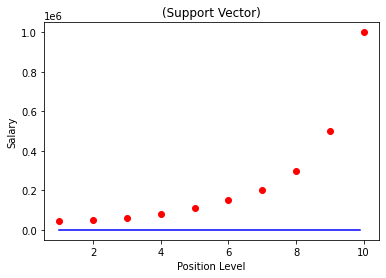

In [32]:
x_grid = np.arange(min(_X),max(_X),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(_X,_Y, color = 'red')
plt.plot(x_grid, sc_Y.inverse_transform(regressor.predict(sc_X.transform(x_grid))),color = 'blue')
plt.title('(Support Vector)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()